## One-way and two-way ANOVA (Part I)

Recall the following definitions:

- One-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of one categorical variable.
- Two-way ANOVA: Compares the means of one continuous dependent variable based on three or more groups of two categorical variables.

In [22]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [23]:
diamonds_raw = sns.load_dataset('diamonds', cache=False)
diamonds_raw.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Cleaning

In [24]:
diamonds_raw['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [25]:
color_count = diamonds_raw['color'].value_counts().reset_index()
color_count['frequency'] = round((color_count['count'] / diamonds_raw.shape[0]) *100,2)

color_count

,color,count,frequency
0,G,11292,20.93
1,E,9797,18.16
2,F,9542,17.69
3,H,8304,15.39
4,D,6775,12.56
5,I,5422,10.05
6,J,2808,5.21


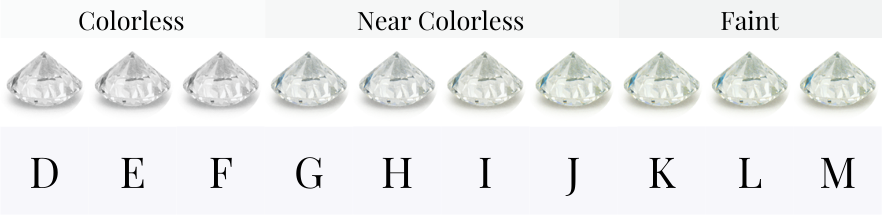

I took a subset of colorless and near colorless diamonds. I excluded G color grade diamonds as there were many more of them, and I excluded J color grade diamonds as there were significantly fewer of them

In [26]:
colorless = diamonds_raw[~diamonds_raw['color'].isin(['G','J'])][['color','price']]
colorless.reset_index(drop=True,inplace=True)
colorless

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336
...,...,...
39835,D,2757
39836,D,2757
39837,D,2757
39838,H,2757


In [27]:
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [28]:
colorless['color'] = colorless['color'].cat.remove_categories(['G','J'])
colorless['color'].values

['E', 'E', 'E', 'I', 'I', ..., 'D', 'D', 'D', 'H', 'D']
Length: 39840
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [29]:
colorless.head()

,color,price
0,E,326
1,E,326
2,E,327
3,I,334
4,I,336


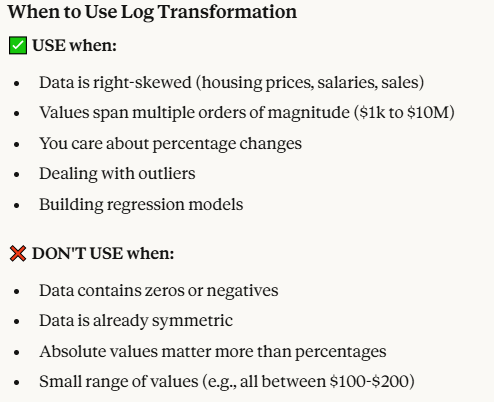

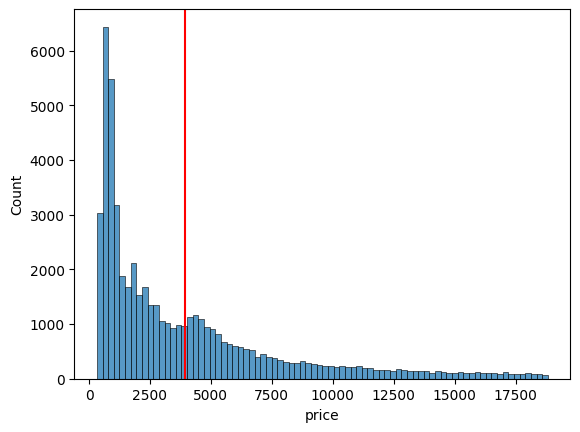

In [30]:
sns.histplot(diamonds_raw['price'])

plt.axvline(diamonds_raw['price'].mean(), color = 'red')

In [31]:
colorless['log_price'] = colorless.apply( lambda row: round(math.log(row['price']),3), axis = 1)
colorless

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817
...,...,...,...
39835,D,2757,7.922
39836,D,2757,7.922
39837,D,2757,7.922
39838,H,2757,7.922


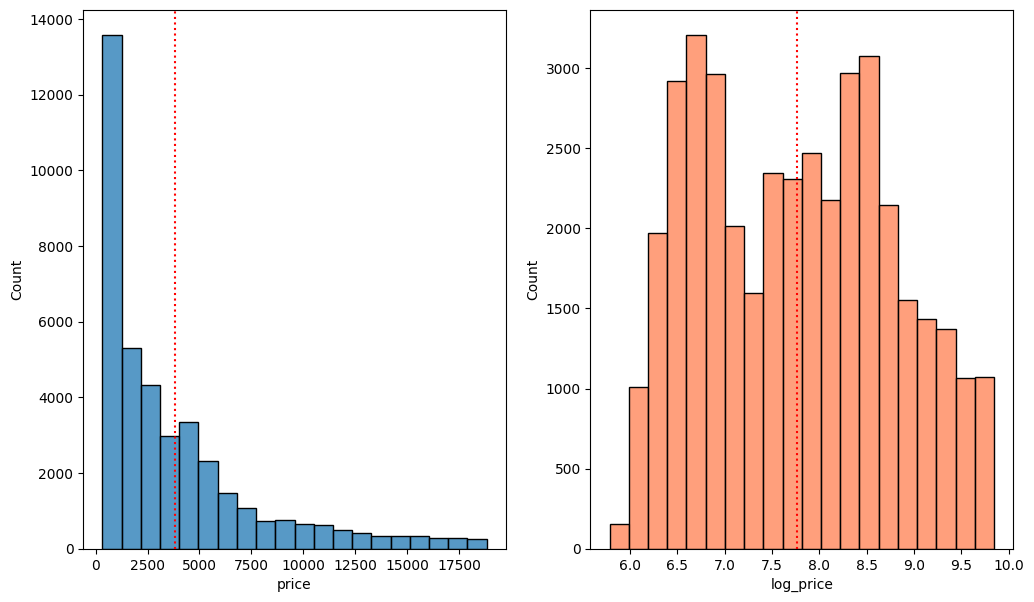

In [32]:
fig, axes = plt.subplots(1,2,figsize= (12,7))

sns.histplot(
    colorless['price'],
    ax= axes[0],
    bins= 20
)

sns.histplot(
    colorless['log_price'],
    ax= axes[1],
    color='coral',
    bins = 20
)

axes[0].axvline(colorless['price'].mean(),color='red',ls=':')
axes[1].axvline(colorless['log_price'].mean(),color='red',ls=':')

In [33]:
# Save the new clean data
colorless.to_csv('./raw_data/diamonds_clean.csv',index=False,header=list(colorless.columns))

## One-way ANOVA

In [103]:
diamonds_oneway = pd.read_csv('./raw_data/diamonds_clean.csv')
diamonds_oneway.head()

,color,price,log_price
0,E,326,5.787
1,E,326,5.787
2,E,327,5.790
3,I,334,5.811
4,I,336,5.817


one-way ANOVA helps to better understand the relationship between a categorical variable and a continuous variable

C:\Users\andre\AppData\Local\Temp\ipykernel_6572\1198842081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_6572\1198842081.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


<Axes: xlabel='color', ylabel='price'>

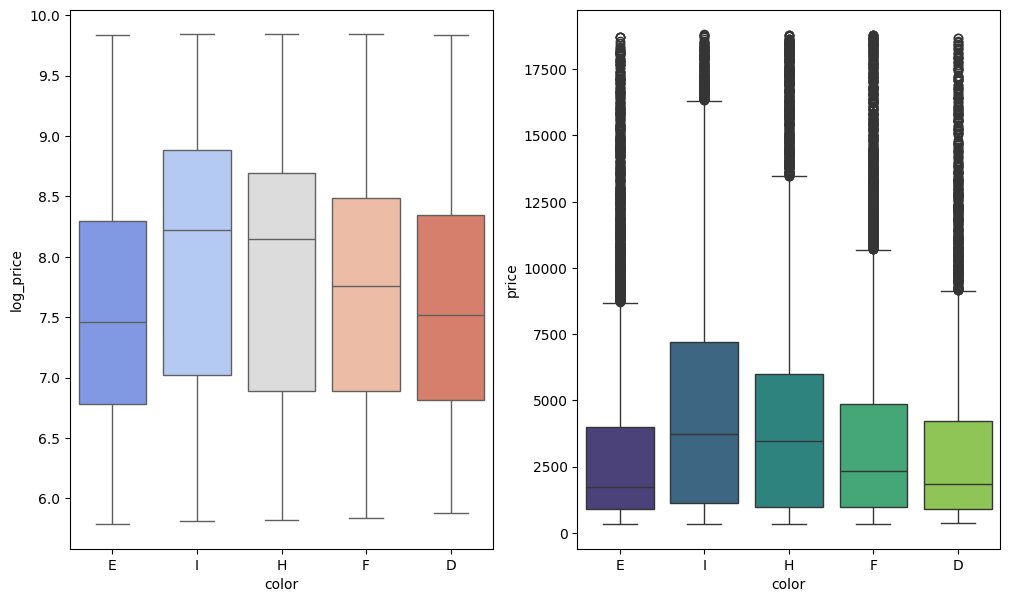

In [104]:
fig, axes = plt.subplots(1,2,figsize=(12,7))

sns.boxplot(
    data = diamonds_oneway,
    x = 'color',
    y = 'log_price',
    ax = axes[0],
    palette='coolwarm'
)

sns.boxplot(
    data= diamonds_oneway,
    x = 'color',
    y = 'price',
    ax = axes[1],
    palette='viridis'
)

***
### Create the model

In [105]:
price_color_model = ols(formula = 'log_price ~ C(color)', data = diamonds_oneway).fit()
price_color_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     265.0
Date:                Fri, 23 Jan 2026   Prob (F-statistic):          3.52e-225
Time:                        14:23:08   Log-Likelihood:                -56182.
No. Observations:               39840   AIC:                         1.124e+05
Df Residuals:                   39835   BIC:                         1.124e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.6169      0.012    632.423      0.000       7.593       7.641
C(color)[T.E]    -0.0375      0.016     -2.395      0.017      -0.068      -0.007
C(color)[T.F]     0.1455      0.016      9.241      0.000       0.115       0.176
C(color)[T.H]     0.3015      0.016     18.580      0.000       0.270       0.333
C(color)[T.I]     0.4061      0.018     22.478      0.000       0.371       0.441
==============================================================================
Omnibus:                     7112.256   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1542.819
Skew:                           0.079   Prob(JB):                         0.00
Kurtosis:                       2.049   Cond. No.                         6.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f(log_price) = ((Color_I[0/1])*0.4061) + ((Color_H[0/1])*0.3015) + ((Color_F[0/1])*(0.1455)) + ((Color_E[0/1])*(-0.0375)) + 7.6169

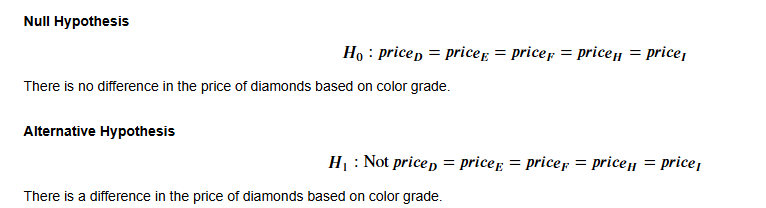

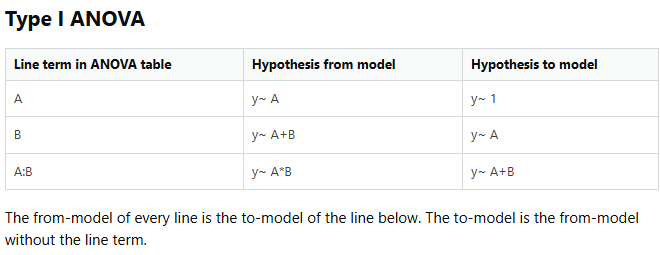

In [37]:
# Run oneway ANOVA

sm.stats.anova_lm(price_color_model,typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,1041.734757,260.433689,265.000059,3.521965e-225
Residual,39835.0,39148.579930,0.982768,NaN,NaN


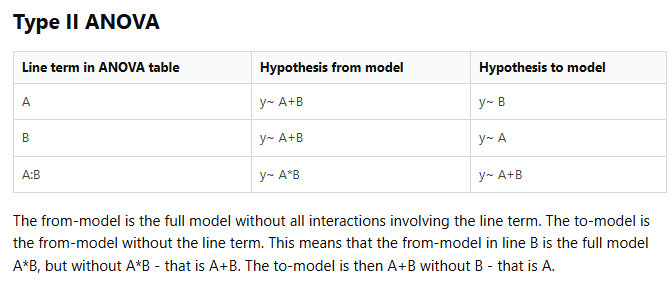

In [38]:
sm.stats.anova_lm(price_color_model,typ = 2)

,sum_sq,df,F,PR(>F)
C(color),1041.734757,4.0,265.000059,3.521965e-225
Residual,39148.579930,39835.0,NaN,NaN


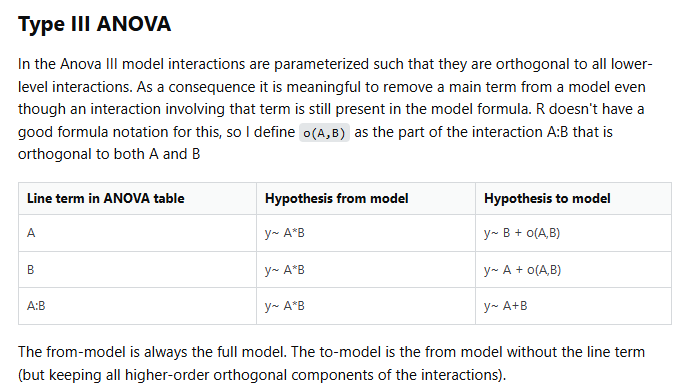

In [39]:
sm.stats.anova_lm(price_color_model,typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,393066.990146,1.0,399958.914992,0.000000e+00
C(color),1041.734757,4.0,265.000059,3.521965e-225
Residual,39148.579930,39835.0,NaN,NaN


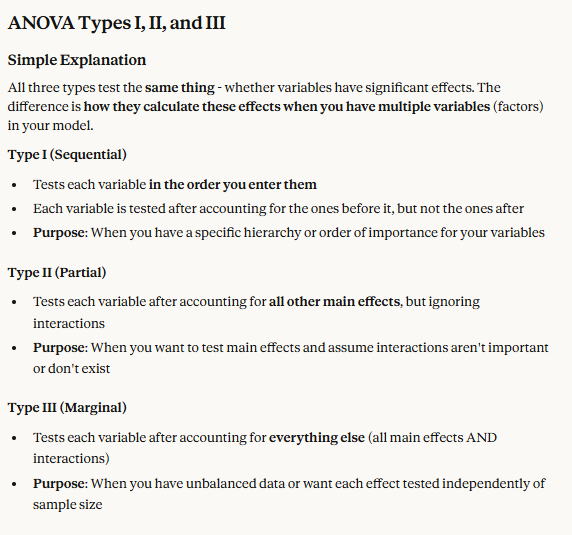

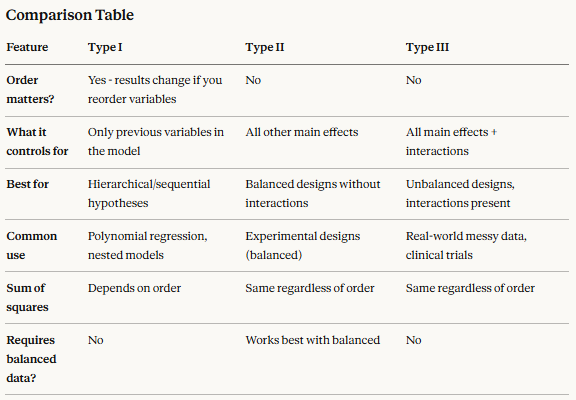

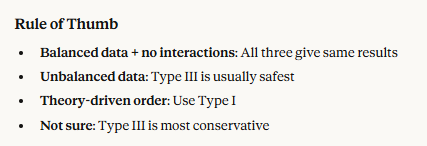

## ANOVA post hoc test (Part II)

Post hoc test
There are many post hoc tests that can be run. One of the most common ANOVA post hoc tests is the Tukey's HSD (honestly significantly different) test.

In [106]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_oneway = pairwise_tukeyhsd(endog= diamonds_oneway['log_price'], groups=diamonds_oneway['color'], alpha = 0.05)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-0.0375,0.1167,-0.0802,0.0052,False
D,F,0.1455,0.0,0.1026,0.1885,True
D,H,0.3015,0.0,0.2573,0.3458,True
D,I,0.4061,0.0,0.3568,0.4553,True
E,F,0.1831,0.0,0.1442,0.222,True
E,H,0.3391,0.0,0.2987,0.3794,True
E,I,0.4436,0.0,0.3978,0.4893,True
F,H,0.156,0.0,0.1154,0.1966,True
F,I,0.2605,0.0,0.2145,0.3065,True
H,I,0.1045,0.0,0.0573,0.1517,True


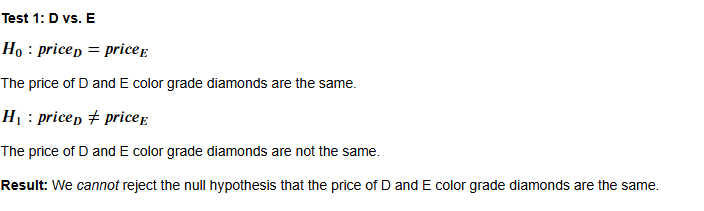

alpha tells the function the significance or confidence level, which we'll set to 0.05. We'll aim for the typical 95% confidence level.

***
# Two-Ways ANOVA 

***

### Starting the process with raw dataset

In [64]:
diamonds_raw = sns.load_dataset('diamonds',cache=False)
diamonds_raw

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [65]:
## Data cleaning II

diamonds = diamonds_raw[(~diamonds_raw['color'].isin(['G','J'])) & (~diamonds_raw['cut'].isin(['Good','Fair']))].reset_index()
diamonds

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
4,7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
...,...,...,...,...,...,...,...,...,...,...,...
34930,53934,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
34931,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
34932,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
34933,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [66]:
diamonds['color'].values

['E', 'E', 'I', 'I', 'H', ..., 'D', 'D', 'D', 'H', 'D']
Length: 34935
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [67]:
diamonds['cut'].values

['Ideal', 'Premium', 'Premium', 'Very Good', 'Very Good', ..., 'Premium', 'Ideal', 'Very Good', 'Premium', 'Ideal']
Length: 34935
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [68]:
# Will need to drop the categories 'G' and 'J' from color / remove also the categories 'Good' and 'Fair' from cut

diamonds['color'] = diamonds['color'].cat.remove_categories(['G','J'])
diamonds['cut'] = diamonds['cut'].cat.remove_categories(['Good','Fair'])

diamonds['color'].values

['E', 'E', 'I', 'I', 'H', ..., 'D', 'D', 'D', 'H', 'D']
Length: 34935
Categories (5, object): ['D', 'E', 'F', 'H', 'I']

In [69]:
diamonds['cut'].values

['Ideal', 'Premium', 'Premium', 'Very Good', 'Very Good', ..., 'Premium', 'Ideal', 'Very Good', 'Premium', 'Ideal']
Length: 34935
Categories (3, object): ['Ideal', 'Premium', 'Very Good']

In [70]:
diamonds.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [55]:
# There are no NA's in the model

In [71]:
diamonds = diamonds[['cut','color','price']].reset_index(drop=True)
diamonds.head()

,cut,color,price
0,Ideal,E,326
1,Premium,E,326
2,Premium,I,334
3,Very Good,I,336
4,Very Good,H,337


In [72]:
diamonds['log_price'] = diamonds.apply(lambda diamond: round(math.log(diamond['price']),4),axis= 1)

diamonds.head()

,cut,color,price,log_price
0,Ideal,E,326,5.7869
1,Premium,E,326,5.7869
2,Premium,I,334,5.8111
3,Very Good,I,336,5.8171
4,Very Good,H,337,5.8201


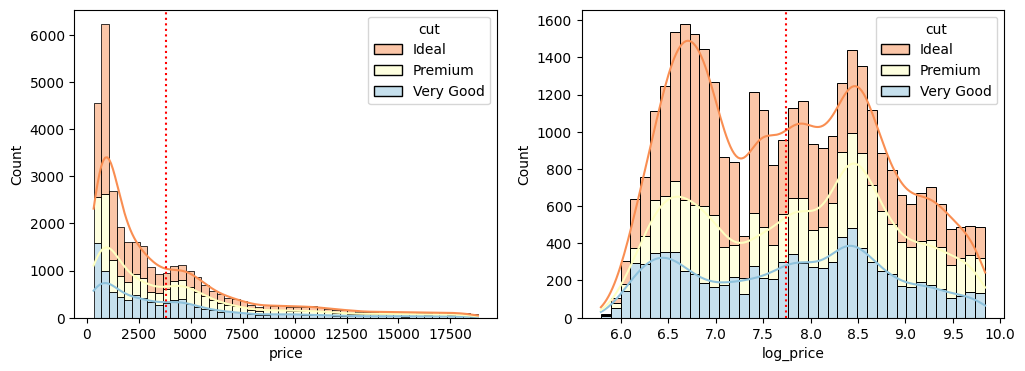

In [94]:
fig, axes = plt.subplots(1,2,figsize = (12,4))

sns.histplot(
    data= diamonds,
    x = 'price',
    hue= 'cut',
    ax = axes[0],
    multiple= 'stack',
    kde=True,
    bins = 50,
    palette= 'RdYlBu'
)

sns.histplot(
    data= diamonds,
    x = 'log_price',
    hue= 'cut',
    multiple= 'stack',
    ax = axes[1],
    kde = True,
    palette='RdYlBu'
)

axes[0].axvline(diamonds['price'].mean(),color='red',ls= ':')
axes[1].axvline(diamonds['log_price'].mean(),color='red',ls= ':')

In [95]:
diamonds.to_csv('./raw_data/diamonds_two_cat_variable.csv',index=False,header=list(diamonds.columns))

In [96]:
diamonds_anova_two = pd.read_csv('./raw_data/diamonds_two_cat_variable.csv')
diamonds_anova_two.head()

,cut,color,price,log_price
0,Ideal,E,326,5.7869
1,Premium,E,326,5.7869
2,Premium,I,334,5.8111
3,Very Good,I,336,5.8171
4,Very Good,H,337,5.8201


In [99]:
# Create the model

cut_color_price_model = ols(formula= 'log_price ~ C(color) + C(cut) + C(color):C(cut)', data = diamonds_anova_two).fit()
cut_color_price_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     119.5
Date:                Fri, 23 Jan 2026   Prob (F-statistic):               0.00
Time:                        14:12:24   Log-Likelihood:                -49159.
No. Observations:               34935   AIC:                         9.835e+04
Df Residuals:                   34920   BIC:                         9.847e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             7.4567      0.019    401.583      0.000       7.420       7.493
C(color)[T.E]                        -0.0056      0.024     -0.231      0.817      -0.053       0.042
C(color)[T.F]                         0.1755      0.024      7.165      0.000       0.128       0.224
C(color)[T.H]                         0.2756      0.026     10.739      0.000       0.225       0.326
C(color)[T.I]                         0.3787      0.028     13.294      0.000       0.323       0.435
C(cut)[T.Premium]                     0.2828      0.031      9.153      0.000       0.222       0.343
C(cut)[T.Very Good]                   0.2295      0.031      7.290      0.000       0.168       0.291
C(color)[T.E]:C(cut)[T.Premium]      -0.0322      0.040     -0.800      0.424      -0.111       0.047
C(color)[T.F]:C(cut)[T.Premium]       0.0313      0.040      0.776      0.438      -0.048       0.110
C(color)[T.H]:C(cut)[T.Premium]       0.0947      0.041      2.308      0.021       0.014       0.175
C(color)[T.I]:C(cut)[T.Premium]       0.0841      0.046      1.832      0.067      -0.006       0.174
C(color)[T.E]:C(cut)[T.Very Good]    -0.0931      0.041     -2.294      0.022      -0.173      -0.014
C(color)[T.F]:C(cut)[T.Very Good]    -0.1013      0.041     -2.459      0.014      -0.182      -0.021
C(color)[T.H]:C(cut)[T.Very Good]    -0.0247      0.043     -0.576      0.565      -0.109       0.059
C(color)[T.I]:C(cut)[T.Very Good]     0.0359      0.048      0.753      0.451      -0.057       0.129
==============================================================================
Omnibus:                     4862.909   Durbin-Watson:                   0.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1246.559
Skew:                           0.108   Prob(JB):                    2.06e-271
Kurtosis:                       2.100   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

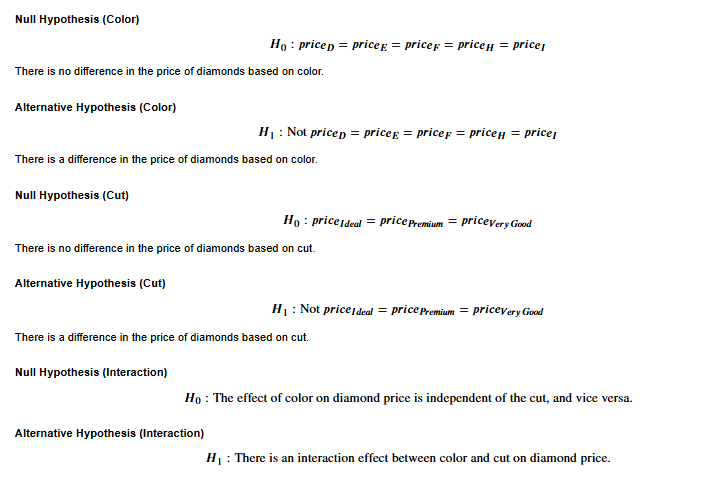

In [100]:
sm.stats.anova_lm(cut_color_price_model,typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),4.0,977.194011,244.298503,250.020626,3.750383e-212
C(cut),2.0,630.641938,315.320969,322.706628,1.348090e-139
C(color):C(cut),8.0,27.478476,3.434810,3.515262,4.531975e-04
Residual,34920.0,34120.799798,0.977113,NaN,NaN


In [101]:
sm.stats.anova_lm(cut_color_price_model,typ = 2)

,sum_sq,df,F,PR(>F)
C(color),926.359694,4.0,237.014378,3.483886e-201
C(cut),630.641938,2.0,322.706628,1.348090e-139
C(color):C(cut),27.478476,8.0,3.515262,4.531975e-04
Residual,34120.799798,34920.0,NaN,NaN


In [102]:
sm.stats.anova_lm(cut_color_price_model,typ = 3)

,sum_sq,df,F,PR(>F)
Intercept,157578.086389,1.0,161268.985756,0.000000e+00
C(color),319.144184,4.0,81.654848,4.137921e-69
C(cut),100.142609,2.0,51.244108,5.991859e-23
C(color):C(cut),27.478476,8.0,3.515262,4.531975e-04
Residual,34120.799798,34920.0,NaN,NaN
